# Quantium Virtual Internship

# Data Exploration

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import inspect, os, sys
import pickle
import datetime as dt
from statsmodels.graphics import mosaicplot

from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html td { white-space: pre; }</style>"))

sys.path.append('C://Users//Dhruv Sharma//AppData//Local//Programs//Python//Python37//Lib//site-packages')

### Reading customer and transaction data

In [2]:
def store_df():
    script_path = inspect.getfile(inspect.currentframe())
    script_dir = os.path.dirname(os.path.abspath(script_path))
    purchase_behaviour_df = pd.read_csv(
        os.path.join(script_dir, "QVI_purchase_behaviour.csv"))
    transaction_df = pd.read_excel(
        os.path.join(script_dir, "QVI_transaction_data.xlsx"))
    with open('dfs.pickle', 'wb') as f:
        pickle.dump(purchase_behaviour_df, f)
        pickle.dump(transaction_df, f)

def get_df():
    with open('dfs.pickle', 'rb') as f:
        df1 = pickle.load(f)
        df2 = pickle.load(f)
        return df1, df2

if not os.path.exists('dfs.pickle'):
    store_df()
purchase_behaviour_df, transaction_df = get_df()

### Examining data

In [3]:
purchase_behaviour_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
print('PURCHASE BEHAVIOUR'.center(50), purchase_behaviour_df.dtypes, sep='\n', end='\n\n')
print('Missing Values', purchase_behaviour_df.isnull().sum(), sep='\n')

                PURCHASE BEHAVIOUR                
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

Missing Values
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [5]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [6]:
print('TRANSACTION DATA'.center(50), transaction_df.dtypes, sep='\n', end='\n\n')
print('Missing Values',transaction_df.isnull().sum(), sep='\n')

                 TRANSACTION DATA                 
DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Missing Values
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


###### There are no null values in Customer data or in Transaction data

### Changing numeric excel dates

In [7]:
transaction_df['DATE'] = pd.TimedeltaIndex(
    transaction_df['DATE'], unit='d') + dt.datetime(1899, 12, 30)
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


### PROD_NAME column summary

In [8]:
transaction_df['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

### Cleaning PROD_NAME column

In [9]:
import re
ser = transaction_df['PROD_NAME']
ser = ser.apply(lambda s:re.sub(r'([0-9]+)' , r' \1', s)) #adding space before pack size
ser = ser.apply(lambda s:re.sub(r'[^A-Za-z0-9]+', r' ', s)) #removing all special characters
transaction_df['PROD_NAME'] = ser
ser = ser.apply(lambda s:re.sub(r'\s?\w*\d+\w*', '', s)) #removing words having digits
ser.head()

0            Natural Chip Compny SeaSalt
1                       CCs Nacho Cheese
2       Smiths Crinkle Cut Chips Chicken
3       Smiths Chip Thinly S Cream Onion
4    Kettle Tortilla ChpsHny Jlpno Chili
Name: PROD_NAME, dtype: object

### Finding most common words by frequency

In [10]:
from collections import Counter
word_list = ' '.join(ser.unique())
c = Counter(word_list.split())
c.most_common(10) #top 10 most common words

[('Chips', 21),
 ('Smiths', 16),
 ('Crinkle', 14),
 ('Cut', 14),
 ('Kettle', 13),
 ('Cheese', 12),
 ('Salt', 12),
 ('Original', 10),
 ('Chip', 9),
 ('Salsa', 9)]

### Removing salsa products

In [11]:
# todel = ser[ser.str.contains(r'salsa', case=False)].index.values
# transaction_df.drop(todel, inplace=True)

### Removing outliers

In [12]:
transaction_df['PROD_QTY'].describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [13]:
transaction_df.loc[transaction_df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [14]:
todrop = transaction_df.loc[transaction_df['PROD_QTY'] == 200].index
transaction_df.drop(todrop, inplace=True)
transaction_df.shape

(264834, 8)

### Finding missing dates

In [15]:
df = transaction_df.groupby(['DATE']).size().reset_index(name='COUNT')
print(transaction_df['DATE'].min(), transaction_df['DATE'].max(), sep='\n')

2018-07-01 00:00:00
2019-06-30 00:00:00


In [16]:
dates = pd.date_range('2018-07-01', '2019-06-30')
dates = pd.Series(dates, name='DATE_RANGE')
df = df.merge(dates, how='right', left_on='DATE', right_on='DATE_RANGE')
# df.fillna(0, inplace=True)
df.sort_values(by=['DATE_RANGE'], inplace=True)
df[df['DATE'].isnull()]

,DATE,COUNT,DATE_RANGE
364,NaT,NaN,2018-12-25


###### The missing date is found to be 2018-12-25

### Plotting transactions over time

Text(0, 0.5, 'Transaction Count')

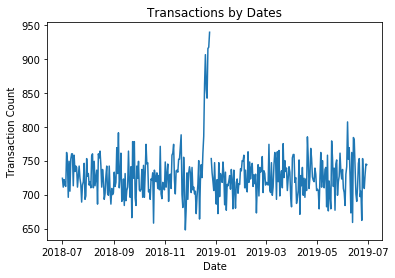

In [17]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots()
axis.plot(df['DATE_RANGE'], df['COUNT'])
plt.title('Transactions by Dates')
plt.xlabel('Date')
plt.ylabel('Transaction Count')

### Transactions for December month

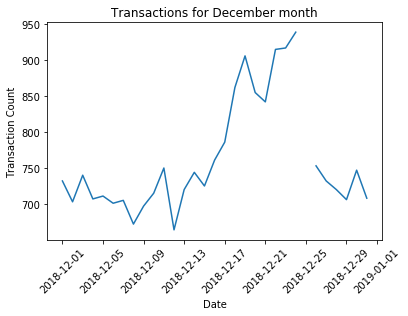

In [18]:
x = df.loc[(df['DATE_RANGE'] >= '2018-12-01') & (df['DATE_RANGE'] <='2018-12-31'), 'DATE_RANGE']
y = df.loc[(df['DATE_RANGE'] >= '2018-12-01') & (df['DATE_RANGE'] <='2018-12-31'), 'COUNT']
fig, axis = plt.subplots()
axis.plot(x, y)
plt.title('Transactions for December month')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
axis.xaxis.set_tick_params(rotation=45)

### Creating pack size column

In [19]:
pack_size = transaction_df['PROD_NAME'].apply(lambda s:re.sub(r'[^0-9]', '', s))
pack_size = pack_size.astype('int32')
transaction_df['PACK_SIZE'] = pack_size #adding new column pack size
pack_size.sort_values(inplace=True, ignore_index=True)
pack_size

0          70
1          70
2          70
3          70
4          70
         ... 
264829    380
264830    380
264831    380
264832    380
264833    380
Name: PROD_NAME, Length: 264834, dtype: int32

### Histogram for pack size

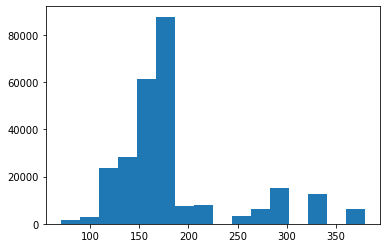

In [20]:
plt.hist(pack_size, bins=16)
plt.show()

### Creating brand names column

In [21]:
brand_names = transaction_df['PROD_NAME'].apply(lambda s:(re.search(r'[A-Za-z]+', s)).group())
transaction_df['BRAND'] = brand_names.str.upper()
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0,175,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8,150,KETTLE
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,KETTLE
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,TOSTITOS
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,DORITOS
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,DORITOS


### Combining brand names

In [22]:
transaction_df['BRAND'].unique()

array(['NATURAL', 'CCS', 'SMITHS', 'KETTLE', 'OLD', 'GRAIN', 'DORITOS',
       'TWISTIES', 'WW', 'THINS', 'BURGER', 'NCC', 'CHEEZELS', 'INFZNS',
       'RED', 'PRINGLES', 'DORITO', 'INFUZIONS', 'SMITH', 'GRNWVES',
       'TYRRELLS', 'COBS', 'WOOLWORTHS', 'FRENCH', 'RRD', 'TOSTITOS',
       'CHEETOS', 'SNBTS', 'SUNBITES'], dtype=object)

In [23]:
b_names = {'NCC':'NATURAL', 'SMITH': 'SMITHS', 'GRAIN':'GRNWVES',
           'WW':'WOOLWORTHS', 'RED':'RRD', 'SNBTS':'SUNBITES',
          'DORITO':'DORITOS', 'INFZNS':'INFUZIONS'}
def combine_brands(brand):
    if brand in b_names:
        return b_names[brand]
    else:
        return brand

transaction_df['BRAND'] = transaction_df['BRAND'].apply(lambda brand:combine_brands(brand))
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0,175,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8,150,KETTLE
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,KETTLE
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,TOSTITOS
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,DORITOS
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,DORITOS


### Exploring customer data

In [24]:
print(purchase_behaviour_df['LIFESTAGE'].unique(),
      purchase_behaviour_df['PREMIUM_CUSTOMER'].unique(),
     sep='\n\n')
purchase_behaviour_df

['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']

['Premium' 'Mainstream' 'Budget']


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


### Changing lifestage column case

In [25]:
# purchase_behaviour_df['LIFESTAGE'] = purchase_behaviour_df['LIFESTAGE'].apply(lambda s:s.title())
# purchase_behaviour_df['LIFESTAGE']

### Merging transaction data with customer data

In [26]:
merged_df = transaction_df.merge(purchase_behaviour_df, on='LYLTY_CARD_NBR')
merged_df.sort_values('LYLTY_CARD_NBR', inplace=True)
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
240663,2018-09-16,1,1002,2,58,Red Rock Deli Chikn Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
188930,2019-03-07,1,1003,3,52,Grain Waves Sour Cream Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
188931,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn 175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
102785,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
215730,2018-12-08,88,2370701,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
227597,2018-10-01,88,2370751,240394,60,Kettle Tortilla ChpsFeta Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
53393,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
53394,2018-10-27,88,2370961,240481,65,Old El Paso Salsa Dip Chnky Tom Ht 300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [27]:
merged_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Saving merged dataframe as csv file

In [28]:
merged_df.to_csv("QVI_data.csv", index=False)

# Data Analysis

### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

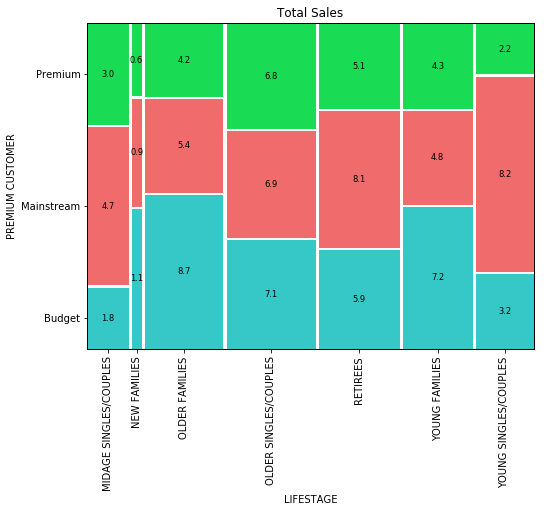

In [29]:
groups_obj = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
sales = groups_obj.sum()['TOT_SALES']

labels = (sales / sales.sum()) * 100
labels = labels.apply(lambda r:round(r,1))

colors = [{'facecolor':'#36c7c7','edgecolor':'white'},
          {'facecolor':'#f06c6c','edgecolor':'white'},
          {'facecolor':'#1adb54','edgecolor':'white'}]

props = {}
j=0
for i in list(groups_obj.groups.keys()):
    props[i] = colors[j]
    if j==len(colors)-1:
        j=0
    else:
        j+=1

fig, ax1 = plt.subplots(figsize=(8,6))
mosaicplot.mosaic(sales, ax=ax1, labelizer=lambda k:dict(labels)[k], properties=props, title='Total Sales')
ax1.set_xlabel('LIFESTAGE')
ax1.set_ylabel('PREMIUM CUSTOMER')
ax1.xaxis.set_tick_params(rotation=90)

###### Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

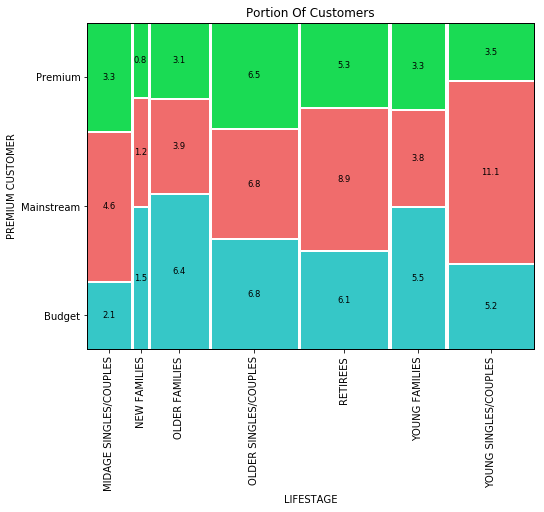

In [30]:
count = groups_obj['LYLTY_CARD_NBR'].nunique()

labels = (count / count.sum()) * 100
labels = labels.apply(lambda r:round(r,1))

fig, ax2 = plt.subplots(figsize=(8,6))
mosaicplot.mosaic(count, ax=ax2, labelizer=lambda k:dict(labels)[k], properties=props)
ax2.set_xlabel('LIFESTAGE')
ax2.set_ylabel('PREMIUM CUSTOMER')
ax2.set_title('Portion Of Customers')
ax2.xaxis.set_tick_params(rotation=90)

###### There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips.

### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

Text(0.5, 0, 'Average no. of units of chips')

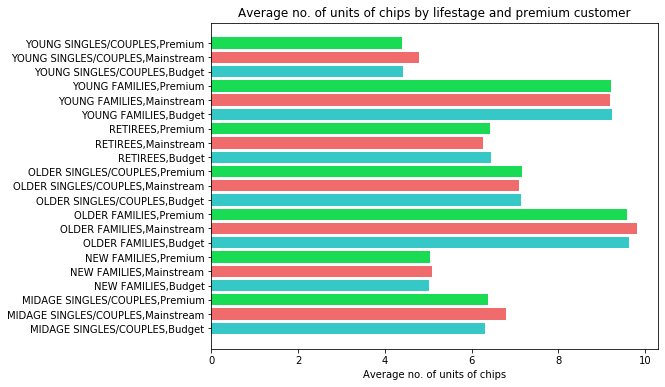

In [31]:
temp = list(merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).groups)
group_labels = []
for group in temp:
    group_labels.append(','.join(group))

cmap = ['#36c7c7', '#f06c6c', '#1adb54']
qty = groups_obj.sum()['PROD_QTY']
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(group_labels, qty/count, color=cmap)
ax.set_title('Average no. of units of chips by lifestage and premium customer')
ax.set_xlabel('Average no. of units of chips')

###### Older families and young families in general buy more chips per customer

### Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

Text(0.5, 0, 'Average price per unit')

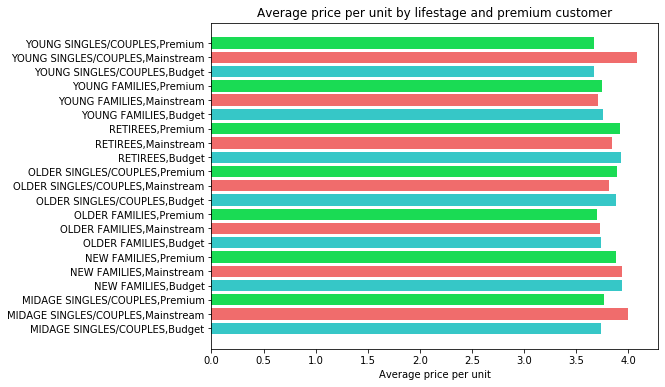

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(group_labels, sales/qty, color=cmap)
ax.set_title('Average price per unit by lifestage and premium customer')
ax.set_xlabel('Average price per unit')

###### Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.

### t-test between mainstream vs premium and budget midage and young singles and couples

In [33]:
from scipy import stats
mainstream = merged_df.loc[merged_df['PREMIUM_CUSTOMER'] == 'Mainstream', :]
mainstream = mainstream.loc[(mainstream['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | 
                            (mainstream['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'), :]

pre_bud = merged_df.loc[(merged_df['PREMIUM_CUSTOMER'] == 'Premium') | 
                        (merged_df['PREMIUM_CUSTOMER'] == 'Budget'), :]
pre_bud = pre_bud.loc[(pre_bud['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | 
                            (pre_bud['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'), :]

mainstream['AVG_PRICE'] = mainstream['TOT_SALES'] / mainstream['PROD_QTY']
pre_bud['AVG_PRICE'] = pre_bud['TOT_SALES'] / pre_bud['PROD_QTY']

stats.ttest_ind(mainstream['AVG_PRICE'], pre_bud['AVG_PRICE'])

Ttest_indResult(statistic=40.83413678791155, pvalue=0.0)

###### The t-test results in a p-value of 0, i.e. the unit price for mainstream, young and mid-age singles and couples
###### ARE significantly higher than that of budget or premium, young and midage singles and couples.

### Finding affinity to brand

In [34]:
target_segment = mainstream.loc[mainstream['LIFESTAGE']=='YOUNG SINGLES/COUPLES',
                            ['LYLTY_CARD_NBR', 'PROD_QTY', 'BRAND', 'PACK_SIZE']]
target_segment.reset_index(inplace=True, drop=True)

others = merged_df.loc[(merged_df['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES') & 
                        (merged_df['PREMIUM_CUSTOMER'] != 'Mainstream'), ['PROD_QTY', 'BRAND', 'PACK_SIZE']]

s1 = (target_segment.groupby('BRAND')['PROD_QTY'].sum()) / (target_segment['PROD_QTY'].sum())
affinity_df = pd.DataFrame(s1)
affinity_df.columns = ['target_segment']
affinity_df['other'] = (others.groupby('BRAND')['PROD_QTY'].sum()) / (others['PROD_QTY'].sum())
affinity_df['affinity_to_brand'] = affinity_df['target_segment'] / affinity_df['other']
affinity_df.sort_values('affinity_to_brand', ascending=False)

,target_segment,other,affinity_to_brand
BRAND,,,
TYRRELLS,0.029587,0.023968,1.234454
TWISTIES,0.043306,0.035355,1.224877
KETTLE,0.185649,0.155243,1.195863
TOSTITOS,0.042581,0.035744,1.191269
OLD,0.041598,0.034931,1.190850
PRINGLES,0.111980,0.094240,1.188241
COBS,0.041856,0.035836,1.167987
DORITOS,0.122877,0.105278,1.167174
INFUZIONS,0.060649,0.053509,1.133443


• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population

• Mainstream young singles/couples are 55% less likely to purchase Burger Rings compared to the rest
of the population

### Using apriori algorithm to find related items

In [35]:
from mlxtend.frequent_patterns import apriori, association_rules
basket = pd.pivot_table(target_segment, index='LYLTY_CARD_NBR', values='PROD_QTY', columns='BRAND', aggfunc=np.sum)
basket.fillna(0, inplace=True)

def encode_units(x):
    if x<=0:
        return 0
    if x>0:
        return 1
basket = basket.applymap(encode_units)
frequent_itemsets = apriori(basket, min_support=0.06, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(KETTLE),(DORITOS),0.378956,0.267928,0.092606,0.244372,0.912081,-0.008927,0.968826
1,(DORITOS),(KETTLE),0.267928,0.378956,0.092606,0.345639,0.912081,-0.008927,0.949084
2,(PRINGLES),(DORITOS),0.250742,0.267928,0.065406,0.260848,0.973576,-0.001775,0.990422
3,(DORITOS),(PRINGLES),0.267928,0.250742,0.065406,0.244116,0.973576,-0.001775,0.991235
4,(PRINGLES),(KETTLE),0.250742,0.378956,0.089515,0.357002,0.942066,-0.005505,0.965856
5,(KETTLE),(PRINGLES),0.378956,0.250742,0.089515,0.236215,0.942066,-0.005505,0.980981
6,(KETTLE),(SMITHS),0.378956,0.203759,0.075668,0.199674,0.979952,-0.001548,0.994896
7,(SMITHS),(KETTLE),0.203759,0.378956,0.075668,0.371359,0.979952,-0.001548,0.987915


###### [INSIGHTS] According to the association rules, we can say that the items
1. Doritos and Pringles
2. Kettle and Pringles
3. Kettle and Smiths
4. Kettle and Doritos
###### are frequently bought together.

### Finding preferred pack size

In [36]:
s2 = (target_segment.groupby('PACK_SIZE')['PROD_QTY'].sum()) / (target_segment['PROD_QTY'].sum())
affinity_df = pd.DataFrame(s2)
affinity_df.columns = ['target_segment']
affinity_df['other'] = (others.groupby('PACK_SIZE')['PROD_QTY'].sum()) / (others['PROD_QTY'].sum())
affinity_df['affinity_to_pack'] = affinity_df['target_segment'] / affinity_df['other']
affinity_df.sort_values('affinity_to_pack', ascending=False)

,target_segment,other,affinity_to_pack
PACK_SIZE,,,
270,0.029846,0.023366,1.277295
380,0.030156,0.023964,1.258400
330,0.057465,0.047511,1.209522
110,0.099658,0.083489,1.193675
134,0.111980,0.094240,1.188241
210,0.027309,0.023200,1.177104
135,0.013849,0.012053,1.149001
250,0.013460,0.011989,1.122716
170,0.075740,0.074888,1.011386


In [37]:
merged_df.loc[merged_df['PACK_SIZE'] == 270, 'BRAND'].unique()

array(['TWISTIES'], dtype=object)

###### Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.